In [10]:
# Test for the estimation of a single image key-points

import argparse
import grpc
import io
import matplotlib.pyplot as plt
import generic_box_pb2
import generic_box_pb2_grpc
from scipy.io import savemat, loadmat
import PIL.Image as PIL_image
import cv2 as cv
import pickle

## These functions assume the matlab file has one image in variable "image"

In [11]:

def process_image(stub, image_path):
    print(f'Processing image: \'{image_path}\'')
    img = cv.imread(image_path)
    dic={"im":img,'frame':0}
    image_bytes = saveBinaryMat(dic)

    request = generic_box_pb2.Data(file=image_bytes)
    response = stub.track(request)

    dados=loadmat(io.BytesIO(response.file))
    savemat("imback.mat",dados,long_field_names=True)

    request = generic_box_pb2.PlotInfo(img=request,file=response)
    
    return stub.plot(request)


def display_image(Data):
    dados=loadmat(io.BytesIO(Data.file))
#    img = PIL_image.open(io.BytesIO(image.data))
    img=dados['im']
    ax = plt.gca()
    ax.imshow(img)
    plt.show()

def saveBinaryMat(dic):
    #save mat file and open it as binary
    savemat("data.mat",dic,long_field_names=True)
    with open("data.mat", 'rb') as fp:
        bytesData = fp.read()

    return bytesData


### Rotina de teste: cria stub para o serviço,chama função que envia mensagem
Target - Nó onde está a correr o serviço

Processing image: 'apink3.jpg'
dict_keys(['__header__', '__version__', '__globals__', 'im', 'session_hash'])


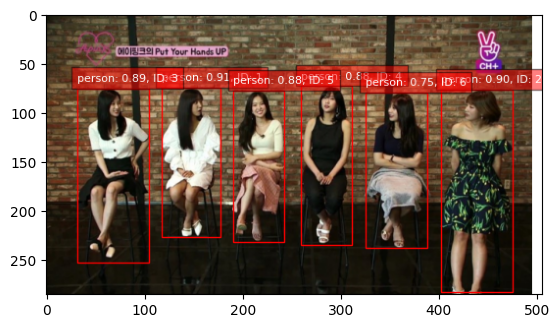

In [12]:
    target = 'localhost:8061'
    image_path = "apink3.jpg"
    with grpc.insecure_channel(target) as channel:
        estimator_stub = generic_box_pb2_grpc.GenericBoxServiceStub(channel)
        try:
            response = process_image(estimator_stub, image_path)
            display_image(response)
        except grpc.RpcError as rpc_error:
            print('An error has occurred:')
            print(f'  Error Code: {rpc_error.code()}')
            print(f'  Details: {rpc_error.details()}')


In [13]:
response.

SyntaxError: invalid syntax (2615864601.py, line 1)